In [240]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

def simulate_data(N):
    start_date = '2000-01-01'
    end_date = '2023-12-31'
    dates = pd.date_range(start=start_date, end=end_date, freq='MS')
    N = len(dates)
    
    # Economic variables
    columns = ['Federal Funds Rate', 'Unemployment Rate', 'Yield Curve Inversion',
               'VIX', 'BCI', 'CCI', 'GDP Growth']
    df = pd.DataFrame(index=dates, columns=columns)
    
    # Initial values based on realistic estimates
    df.loc[dates[0], :] = [1.5, 5.0, 0, 15, 100, 100, 2.5]

    # Simulate each variable with random walk and shocks
    np.random.seed(0)
    for t in range(1, N):
        df.iloc[t]['Federal Funds Rate'] = df.iloc[t-1]['Federal Funds Rate'] + np.random.normal(0, 0.1)
        df.iloc[t]['Unemployment Rate'] = max(0, df.iloc[t-1]['Unemployment Rate'] + np.random.normal(0, 0.2))
        df.iloc[t]['Yield Curve Inversion'] = int(np.random.rand() > 0.8)
        df.iloc[t]['VIX'] = max(10, df.iloc[t-1]['VIX'] + np.random.normal(0, 2))
        df.iloc[t]['BCI'] = max(50, df.iloc[t-1]['BCI'] + np.random.normal(0, 1))
        df.iloc[t]['CCI'] = max(50, df.iloc[t-1]['CCI'] + np.random.normal(0, 1))
        df.iloc[t]['GDP Growth'] = df.iloc[t-1]['GDP Growth'] + np.random.normal(0, 0.5)

    # Calculate monthly changes for relevant columns
    for col in ['VIX', 'BCI', 'CCI', 'GDP Growth']:
        df[col + ' % Change'] = df[col].pct_change() * 100
    
    # Drop rows with any NaN values (typically the first row)
    df = df.dropna()

    return df

In [241]:
def test_granger_causality(data, maxlag=6):
    variables = ['VIX % Change', 'BCI % Change', 'CCI % Change']
    results = {}
    for var in variables:
        print(f"\nTesting causality to GDP Growth from {var}:")
        result = grangercausalitytests(data[['GDP Growth % Change', var]], maxlag=maxlag, verbose=True)
        results[var] = result
    return results

# Generate and process data
data = simulate_data(288)

# Execute the Granger causality tests
granger_results = test_granger_causality(data)


Testing causality to GDP Growth from VIX % Change:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9163  , p=0.0888  , df_denom=283, df_num=1
ssr based chi2 test:   chi2=2.9472  , p=0.0860  , df=1
likelihood ratio test: chi2=2.9322  , p=0.0868  , df=1
parameter F test:         F=2.9163  , p=0.0888  , df_denom=283, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8496  , p=0.0595  , df_denom=280, df_num=2
ssr based chi2 test:   chi2=5.8009  , p=0.0550  , df=2
likelihood ratio test: chi2=5.7427  , p=0.0566  , df=2
parameter F test:         F=2.8496  , p=0.0595  , df_denom=280, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9382  , p=0.1236  , df_denom=277, df_num=3
ssr based chi2 test:   chi2=5.9616  , p=0.1135  , df=3
likelihood ratio test: chi2=5.8998  , p=0.1166  , df=3
parameter F test:         F=1.9382  , p=0.1236  , df_denom=277, df_num=3

Granger Causality
number of lags (no zero

C:\Users\ellac\AppData\Local\Temp\ipykernel_67036\3955283531.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[t]['Federal Funds Rate'] = df.iloc[t-1]['Federal Funds Rate'] + np.random.normal(0, 0.1)
C:\Users\ellac\AppData\Local\T

C:\Users\ellac\AppData\Local\Temp\ipykernel_67036\3955283531.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[t]['Federal Funds Rate'] = df.iloc[t-1]['Federal Funds Rate'] + np.random.normal(0, 0.1)
C:\Users\ellac\AppData\Local\T

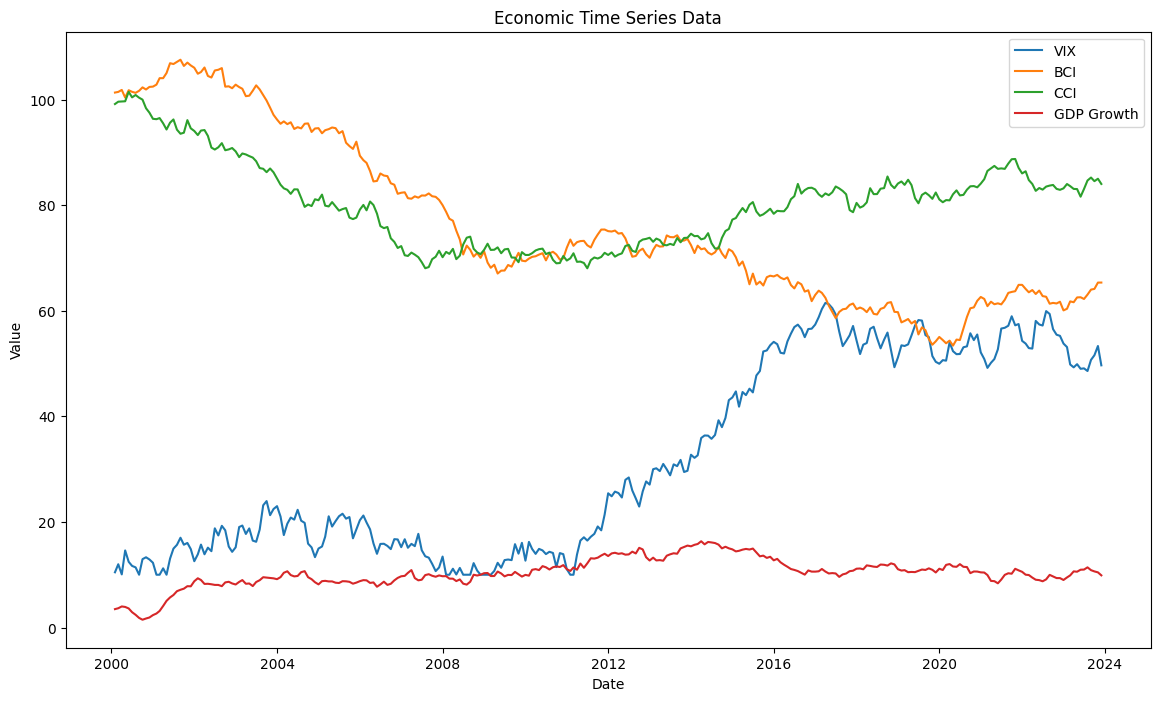


Testing causality to GDP Growth from VIX % Change:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9163  , p=0.0888  , df_denom=283, df_num=1
ssr based chi2 test:   chi2=2.9472  , p=0.0860  , df=1
likelihood ratio test: chi2=2.9322  , p=0.0868  , df=1
parameter F test:         F=2.9163  , p=0.0888  , df_denom=283, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8496  , p=0.0595  , df_denom=280, df_num=2
ssr based chi2 test:   chi2=5.8009  , p=0.0550  , df=2
likelihood ratio test: chi2=5.7427  , p=0.0566  , df=2
parameter F test:         F=2.8496  , p=0.0595  , df_denom=280, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9382  , p=0.1236  , df_denom=277, df_num=3
ssr based chi2 test:   chi2=5.9616  , p=0.1135  , df=3
likelihood ratio test: chi2=5.8998  , p=0.1166  , df=3
parameter F test:         F=1.9382  , p=0.1236  , df_denom=277, df_num=3

Granger Causality
number of lags (no zero

c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\ellac\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


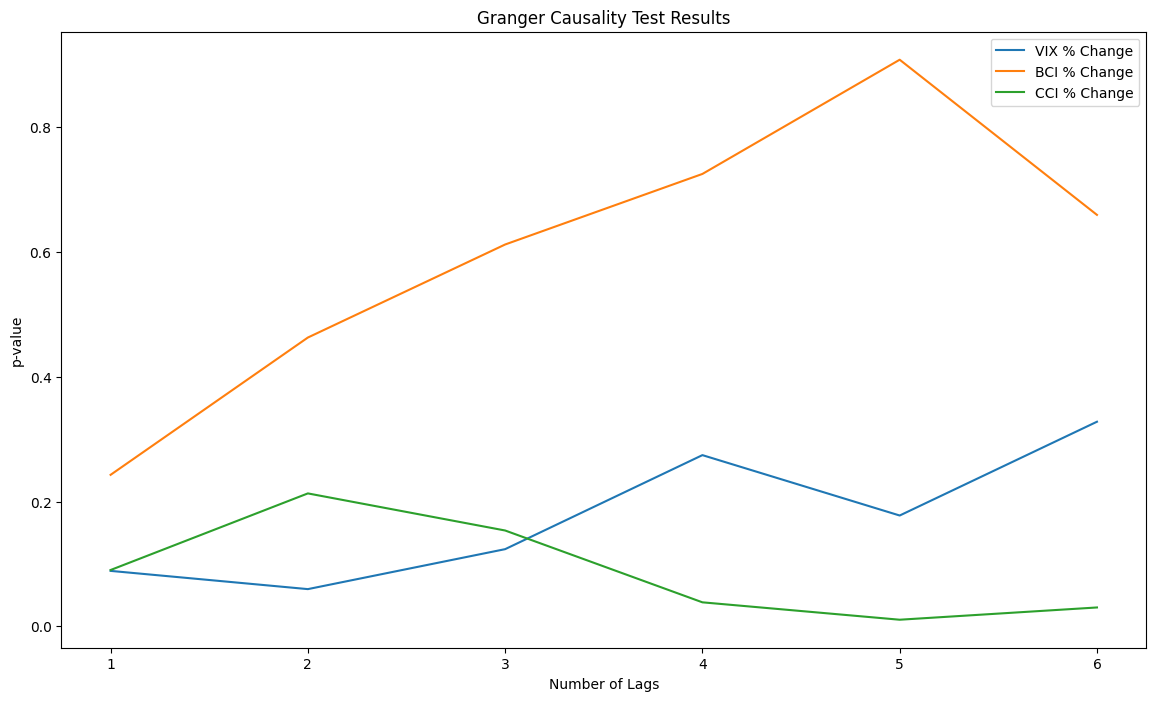

In [243]:
# plots

import matplotlib.pyplot as plt

# Plot the time series data
def plot_time_series(data):
    plt.figure(figsize=(14, 8))
    for col in ['VIX', 'BCI', 'CCI', 'GDP Growth']:
        plt.plot(data.index, data[col], label=col)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Economic Time Series Data')
    plt.legend()
    plt.show()

# Plot the Granger causality test results
def plot_granger_results(granger_results):
    variables = list(granger_results.keys())
    plt.figure(figsize=(14, 8))
    for var in variables:
        p_values = [result[0]['ssr_ftest'][1] for result in granger_results[var].values()]
        plt.plot(range(1, len(p_values) + 1), p_values, label=var)
    plt.xlabel('Number of Lags')
    plt.ylabel('p-value')
    plt.title('Granger Causality Test Results')
    plt.legend()
    plt.show()


# Generate and process data
data = simulate_data(288)

# Plot the time series data
plot_time_series(data)

# Execute the Granger causality tests
granger_results = test_granger_causality(data)

# Plot the Granger causality test results
plot_granger_results(granger_results)
